<a href="https://colab.research.google.com/github/RodolfoPerna/portfolio/blob/master/Lego_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD DATA**

In [130]:
from google.colab import files
uploaded = files.upload()

In [131]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


**READ DATA**

In [0]:
# Read data
themes = pd.read_csv('themes.csv')
sets = pd.read_csv('sets.csv')

**Data exploration and relantionship**

![alt text](https://drive.google.com/uc?id=1Ba-Cs7kJYxHxnZvJ72j6Vr9FXxbmbb_7)

In [0]:
themes = themes.rename(columns={'id': 'theme_id'})

In [139]:
sets = sets.merge(themes, on='theme_id')
sets.head()

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id_x,name,parent_id_y
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0,Supplemental,67.0
2,2181-1,Infomaniac,1997,84,4,Supplemental,67.0,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,84,2,Supplemental,67.0,Supplemental,67.0
4,301-1,Curved Road Plates,1978,84,2,Supplemental,67.0,Supplemental,67.0


In [0]:
parts_by_year = sets[['year','num_parts']].groupby('year', as_index = True).mean()

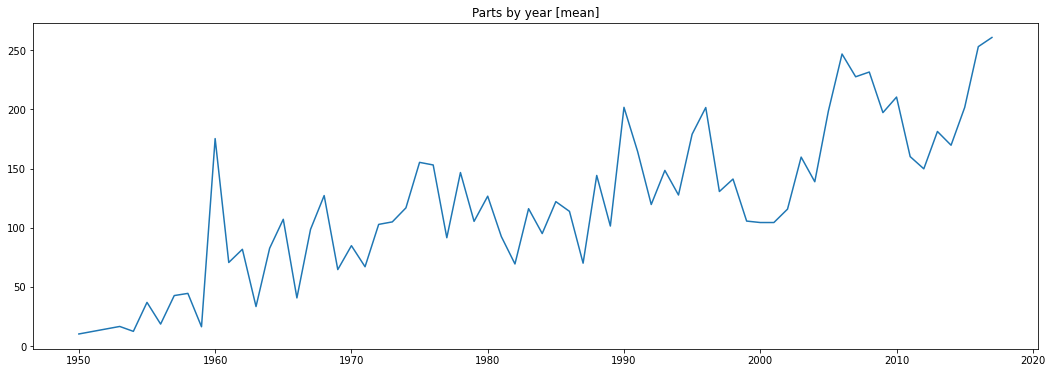

In [135]:
plt.figure(figsize=(18,6)) #define the figure size
plt.title("Parts by year [mean]") #plot title
sns.lineplot(data=parts_by_year['num_parts']) #create line plot

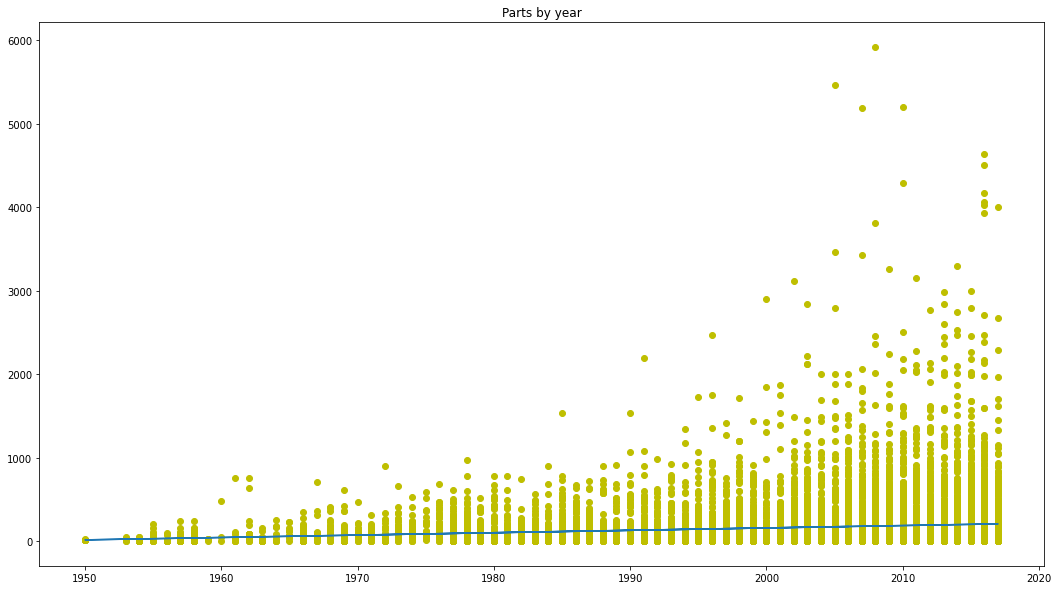

In [155]:
x = sets.year
y = sets.num_parts
m, b = np. polyfit(x, y, 1)
plt.figure(figsize=(18,10))
plt.title("Parts by year")
plt. plot(x, y, 'yo') # create scatter plot.
plt. plot(x, m*x + b) # add line of best fit.

In [140]:
parts_by_theme = sets[['name','num_parts']].groupby('name', as_index = True).mean()
parts_by_theme.sort_values(by = 'num_parts', ascending = False)

,num_parts
name,
Modular Buildings,2350.583333
Mosaic,1843.250000
Sculptures,1716.695652
Ultimate Collector Series,1680.333333
FIRST LEGO League,1387.000000
...,...
Power Functions,1.882353
Imperial Guards,1.000000
Key Chain,0.181818


In [141]:
modular_buildings = sets.loc[sets.name == 'Modular Buildings']
modular_buildings.sort_values(by = 'year', ascending = False)

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id_x,name,parent_id_y
1479,10255-1,Assembly Square,2017,155,4009,Modular Buildings,NaN,Modular Buildings,NaN
1478,10251-1,Brick Bank,2016,155,2383,Modular Buildings,NaN,Modular Buildings,NaN
1477,10246-1,Detective’s Office,2015,155,2261,Modular Buildings,NaN,Modular Buildings,NaN
1476,10243-1,Parisian Restaurant,2014,155,2469,Modular Buildings,NaN,Modular Buildings,NaN
1475,10232-1,Palace Cinema,2013,155,2192,Modular Buildings,NaN,Modular Buildings,NaN
1474,10224-1,Town Hall,2012,155,2771,Modular Buildings,NaN,Modular Buildings,NaN
1473,10218-1,Pet Shop,2011,155,2034,Modular Buildings,NaN,Modular Buildings,NaN
1472,10211-1,Grand Emporium,2010,155,2186,Modular Buildings,NaN,Modular Buildings,NaN
1471,10197-1,Fire Brigade,2009,155,2236,Modular Buildings,NaN,Modular Buildings,NaN
1469,10185-1,Green Grocer,2008,155,2358,Modular Buildings,NaN,Modular Buildings,NaN


In [142]:
mosaic_buildings = sets.loc[sets.name == 'Mosaic']
mosaic_buildings.sort_values(by = 'year', ascending = False)

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id_x,name,parent_id_y
9026,40179-1,Personalised Mosaic Portrait,2016,277,4501,Mosaic,276.0,Mosaic,276.0
9027,6162-1,A World of LEGO Mosaic 4 in 1,2007,277,286,Mosaic,276.0,Mosaic,276.0
9028,6163-1,A World of LEGO Mosaic 9 in 1,2007,277,598,Mosaic,276.0,Mosaic,276.0
9029,k34431-1,Lego Mosaic Cat,2003,277,2126,Mosaic,276.0,Mosaic,276.0
9030,k34432-1,Lego Mosaic Dino,2003,277,2846,Mosaic,276.0,Mosaic,276.0
9031,k34433-1,Lego Mosaic Johnny Thunder,2003,277,2126,Mosaic,276.0,Mosaic,276.0
9032,k34434-1,Lego Mosaic Tiger,2003,277,2216,Mosaic,276.0,Mosaic,276.0
4983,1300-1,Lego Mosaik Set (Small),1955,370,47,Mosaic,365.0,Mosaic,365.0


In [143]:
sculpture_buildings = sets.loc[sets.name == 'Sculptures']
sculpture_buildings.sort_values(by = 'num_parts', ascending = False)

,set_num,name_x,year,theme_id,num_parts,name_y,parent_id_x,name,parent_id_y
730,10189-1,Taj Mahal,2008,276,5922,Sculptures,NaN,Sculptures,NaN
733,10214-1,Tower Bridge,2010,276,4295,Sculptures,NaN,Sculptures,NaN
728,10181-1,Eiffel Tower 1:300 Scale,2007,276,3428,Sculptures,NaN,Sculptures,NaN
731,10196-1,Grand Carousel,2009,276,3260,Sculptures,NaN,Sculptures,NaN
737,10234-1,Sydney Opera House,2013,276,2988,Sculptures,NaN,Sculptures,NaN
738,3450-1,Statue of Liberty,2000,276,2899,Sculptures,NaN,Sculptures,NaN
740,3723-1,Lego Minifigure,2000,276,1849,Sculptures,NaN,Sculptures,NaN
729,10187-1,Volkswagen Beetle (VW Beetle),2008,276,1625,Sculptures,NaN,Sculptures,NaN
741,3724-1,Lego Dragon,2001,276,1538,Sculptures,NaN,Sculptures,NaN
734,10220-1,Volkswagen T1 Camper Van,2011,276,1333,Sculptures,NaN,Sculptures,NaN
